In [1]:
# Dependencies and Setup
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint

dirName='output_data'

try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")
    
dirName='Images'

try:
    # Create target Directory
    os.mkdir(dirName)
    print("Directory " , dirName ,  " Created ") 
except FileExistsError:
    print("Directory " , dirName ,  " already exists")


Directory  output_data  already exists
Directory  Images  already exists


In [2]:
from datetime import date
import datetime
url="https://covidtracking.com/api/v1/states/daily.json"
response=requests.request("GET",url)
corona_df=pd.DataFrame(response.json())
corona_df
corona_df["date"]=corona_df["date"].astype(str)
#today=datetime.date(.strftime("%Y%m%d")
today=date.today().strftime("%Y%m%d")
#today=int(float('today'))
today="20200416"
#print(f"{today}")
curr_corona_df=corona_df.loc[corona_df["date"] == today]
curr_corona_df

Full_Corona_df=corona_df.fillna(0)
Full_Corona_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200417,AK,309.0,9141.0,0.0,0.0,36.0,0.0,0.0,0.0,...,36.0,9450.0,9450.0,9450.0,02,0.0,1.0,706.0,9.0,715.0
1,20200417,AL,4530.0,33318.0,0.0,0.0,594.0,0.0,247.0,0.0,...,594.0,37848.0,37848.0,37848.0,01,11.0,41.0,1272.0,185.0,1457.0
2,20200417,AR,1695.0,21799.0,0.0,83.0,0.0,0.0,0.0,21.0,...,0.0,23494.0,23494.0,23494.0,05,0.0,0.0,744.0,75.0,819.0
3,20200417,AS,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,...,0.0,20.0,3.0,3.0,60,0.0,0.0,0.0,0.0,0.0
4,20200417,AZ,4507.0,44723.0,0.0,566.0,0.0,285.0,0.0,178.0,...,0.0,49230.0,49230.0,49230.0,04,19.0,0.0,1559.0,273.0,1832.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2391,20200301,MI,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,9.0,9.0,9.0,26,0.0,0.0,0.0,0.0,0.0
2392,20200301,RI,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,44,0.0,0.0,0.0,0.0,0.0
2393,20200301,WA,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,30.0,30.0,53,3.0,0.0,0.0,12.0,12.0
2394,20200229,WA,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,18.0,18.0,18.0,53,1.0,0.0,0.0,9.0,9.0


In [3]:
curr_corona_df.to_csv (r'output_data/corona_04162020.csv', index = False, header=True)
Full_Corona_df.to_csv (r'output_data/Full_corona_04162020.csv', index = False, header=True)


In [4]:
curr_corona_df
New_corona_df=curr_corona_df.fillna(0)
New_corona_df
Statelatlong_df=pd.read_csv('statelatlong.csv')

Statelatlong_df
Statelatlong_df.rename(columns = {'State':'state'},inplace=True)
Statelatlong_df
Merge_heat_df=pd.merge(curr_corona_df,Statelatlong_df, on="state", how="outer")
New_Merge_heat_df=Merge_heat_df.fillna(0)
New_Merge_heat_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Latitude,Longitude,City
0,20200416,AK,300.0,8435.0,0.0,0.0,35.0,0.0,0.0,0.0,...,8735.0,02,0.0,1.0,64.0,7.0,71.0,61.302501,-158.775020,Alaska
1,20200416,AL,4345.0,32046.0,0.0,0.0,553.0,0.0,227.0,0.0,...,36391.0,01,12.0,28.0,2082.0,232.0,2314.0,32.601011,-86.680736,Alabama
2,20200416,AR,1620.0,21055.0,0.0,85.0,0.0,0.0,0.0,21.0,...,22675.0,05,4.0,0.0,790.0,51.0,841.0,34.751928,-92.131378,Arkansas
3,20200416,AS,0.0,3.0,17.0,0.0,0.0,0.0,0.0,0.0,...,3.0,60,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0
4,20200416,AZ,4234.0,43164.0,0.0,578.0,0.0,278.0,0.0,188.0,...,47398.0,04,8.0,0.0,1816.0,272.0,2088.0,34.168219,-111.930907,Arizona
5,20200416,CA,26182.0,220218.0,13200.0,5031.0,0.0,1568.0,0.0,0.0,...,246400.0,06,69.0,0.0,28156.0,1758.0,29914.0,37.271875,-119.270415,California
6,20200416,CO,8280.0,32253.0,0.0,0.0,1636.0,0.0,0.0,0.0,...,40533.0,08,28.0,80.0,614.0,339.0,953.0,38.997934,-105.550567,Colorado
7,20200416,CT,15884.0,37238.0,0.0,1926.0,0.0,0.0,0.0,0.0,...,53122.0,09,103.0,0.0,1850.0,1129.0,2979.0,41.518784,-72.757507,Connecticut
8,20200416,DC,2350.0,9800.0,0.0,313.0,0.0,105.0,0.0,79.0,...,12150.0,11,9.0,0.0,472.0,153.0,625.0,38.899349,-77.014567,District of Columbia
9,20200416,DE,2075.0,11275.0,0.0,209.0,0.0,0.0,0.0,0.0,...,13350.0,10,6.0,0.0,187.0,61.0,248.0,39.145251,-75.418921,Delaware


In [5]:
## Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

import gmaps.datasets
city_data = pd.read_csv("output_data/cities.csv")
gmaps.configure(api_key=g_key) # Fill in with your API key

locations = New_Merge_heat_df[['Latitude', 'Longitude']]
weights = New_Merge_heat_df['positive']
maxintensity=max(New_Merge_heat_df['positive'])
pointradius=50

fig = gmaps.figure(center=(39,-98),zoom_level=4)
#fig.add_layer(gmaps.heatmap_layer(locations, weights=weights, max_intensity=maxintensity, point_radius=30))
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights, point_radius=30))
fig


Figure(layout=FigureLayout(height='420px'))

In [6]:
Max_corona_states_df=New_Merge_heat_df.loc[New_Merge_heat_df['positive'] > 20000 ]
Max_corona_states_df

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,Latitude,Longitude,City
5,20200416,CA,26182.0,220218.0,13200.0,5031.0,0.0,1568.0,0.0,0.0,...,246400.0,06,69.0,0.0,28156.0,1758.0,29914.0,37.271875,-119.270415,California
10,20200416,FL,22897.0,196351.0,1325.0,0.0,3460.0,0.0,0.0,0.0,...,219248.0,12,37.0,116.0,5353.0,386.0,5739.0,27.975728,-83.833017,Florida
16,20200416,IL,25733.0,96856.0,0.0,4423.0,0.0,1248.0,0.0,797.0,...,122589.0,17,124.0,0.0,4520.0,1140.0,5660.0,39.739318,-89.504139,Illinois
20,20200416,LA,22532.0,104054.0,0.0,1914.0,0.0,0.0,0.0,396.0,...,126586.0,22,53.0,0.0,4077.0,581.0,4658.0,30.973377,-91.429910,Louisiana
21,20200416,MA,32181.0,108592.0,0.0,3454.0,2340.0,973.0,0.0,0.0,...,140773.0,25,137.0,0.0,6487.0,2263.0,8750.0,42.062940,-71.718067,Massachusetts
24,20200416,MI,29263.0,65023.0,0.0,3809.0,0.0,1447.0,0.0,1211.0,...,94286.0,26,172.0,0.0,3385.0,1204.0,4589.0,44.943560,-86.415805,Michigan
34,20200416,NJ,75317.0,76513.0,0.0,8224.0,0.0,2014.0,0.0,1645.0,...,151830.0,34,362.0,0.0,3522.0,4287.0,7809.0,40.143006,-74.731116,New Jersey
37,20200416,NY,222284.0,328295.0,0.0,17735.0,50450.0,5091.0,0.0,0.0,...,550579.0,36,606.0,4249.0,16062.0,8505.0,24567.0,40.705626,-73.979680,New York
41,20200416,PA,27735.0,113735.0,0.0,2512.0,0.0,0.0,0.0,675.0,...,141470.0,42,60.0,0.0,2641.0,1245.0,3886.0,40.994593,-77.604698,Pennsylvania


In [7]:
# Using the template add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>state</dt><dd>{state}</dd>
<dt>postive</dt><dd>{positive}</dd>
<dt>negative</dt><dd>{negative}</dd>
</dl>
"""
# Store the DataFrame Row
# NOTE: be sure to update with your DataFrame name
state_info = [info_box_template.format(**row) for index, row in Max_corona_states_df.iterrows()]
locations = Max_corona_states_df[['Latitude', 'Longitude']]
markers = gmaps.marker_layer(locations, info_box_content= state_info)

fig.add_layer(markers)

# Display Map
fig

Figure(layout=FigureLayout(height='420px'))

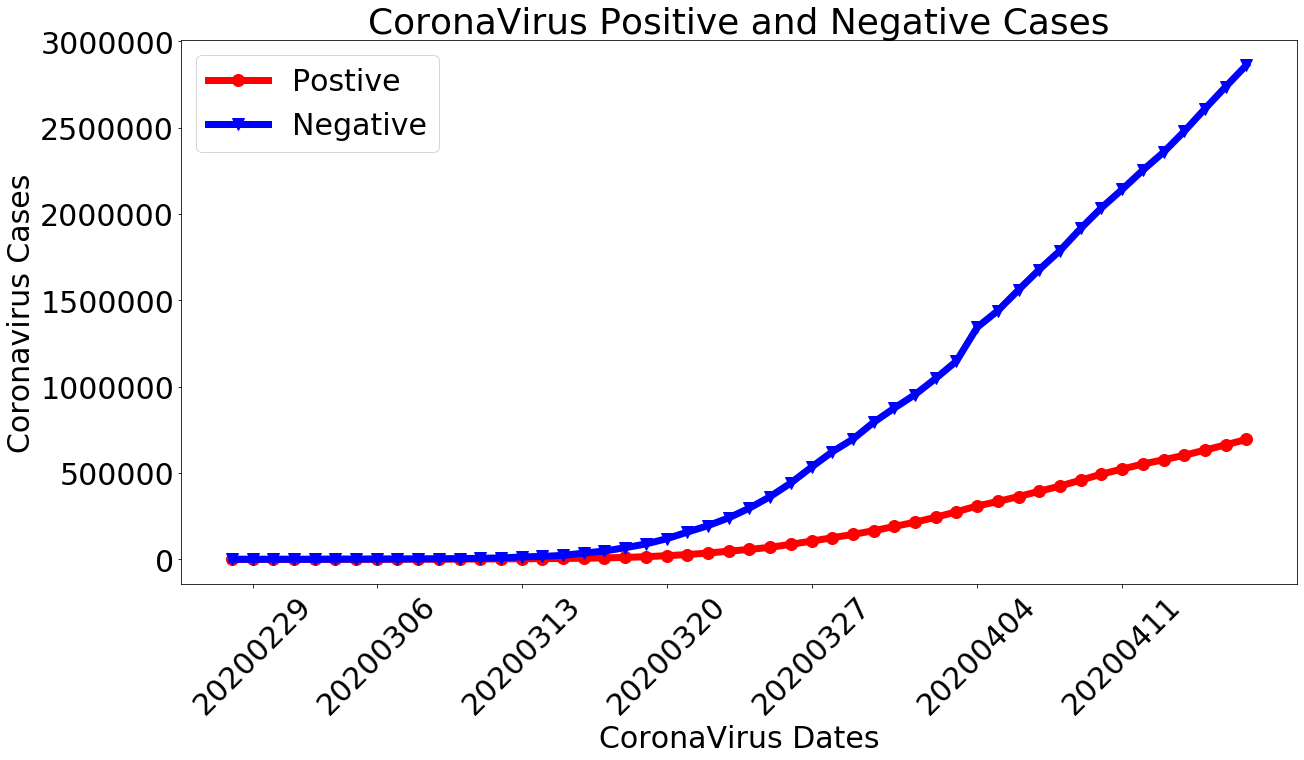

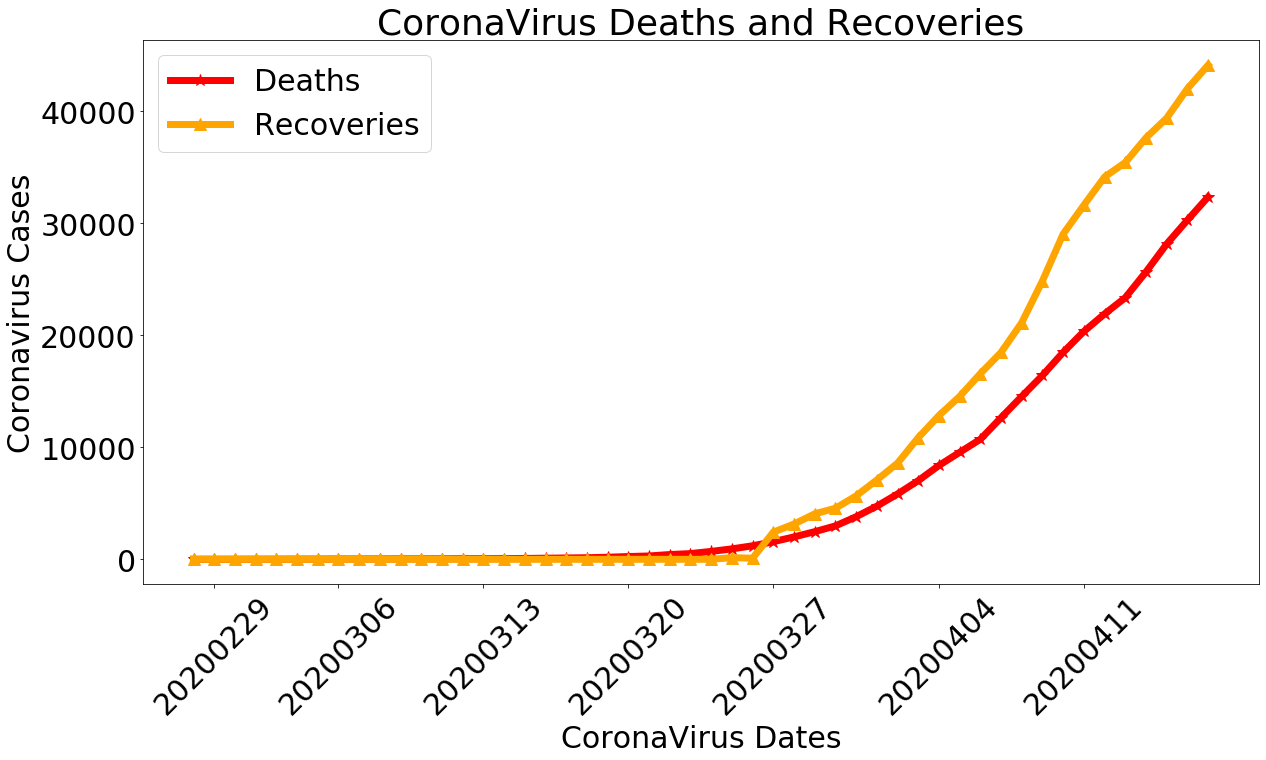

In [8]:
groupbyus_df=Full_Corona_df.groupby("date").sum()
groupbyus_df
import matplotlib as mpl
#groupbyus_df=Full_Corona_df.groupby("date")
#Final_group_df=groupbyus_df["date"].sum().reset_index(name='date')
#Final_group_df
#Final_Tumor_Volume_df=groupby_MouseID_df["Timepoint"].max().reset_index(name='Timepoint')
#Final_Tumor_Volume_df.head(30)
#new_df=groupbyus_df
#new_df
mpl.rcParams['figure.figsize']=(20,10)
plt.rcParams.update({'font.size': 30})
x=groupbyus_df.index.values
x
final=[]
for i in x:
    y=0
    y=int(i)%7
    if y == 0:
        final.append(i)
final
y=groupbyus_df["positive"]
z=groupbyus_df["negative"]
d=groupbyus_df["death"]
r=groupbyus_df["recovered"]
plt.plot(x, y,marker='o',color='red',linestyle="solid",linewidth=7.0, markersize=12)
plt.plot(x,z,marker='v', color='blue',linestyle="solid",linewidth=7.0, markersize=12)
plt.xticks(rotation=45)
plt.title("CoronaVirus Positive and Negative Cases")
plt.xlabel("CoronaVirus Dates")
plt.ylabel("Coronavirus Cases")
plt.xticks(final)
plt.grid(color='white')
plt.gca().legend(('Postive','Negative'))
plt.show()
plt.plot(x,d,marker='*', color='red',linestyle="solid",linewidth=7.0,  markersize=12)
plt.plot(x,r,marker='^', color='orange',linestyle="solid",linewidth=7.0,  markersize=12)
plt.xticks(rotation=45)
plt.title("CoronaVirus Deaths and Recoveries")
plt.xlabel("CoronaVirus Dates")
plt.ylabel("Coronavirus Cases")
plt.xticks(final)
plt.grid(color='white')
plt.gca().legend(('Deaths','Recoveries'))
plt.show()
